<a href="https://colab.research.google.com/github/272572PPiwnicki/fourier/blob/main/poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy.typing import NDArray


def poissoning(image: NDArray, lambda_value: float) -> np.ndarray:
    """
    :param image: numpy array of shape (H, W, C) or (H, W)
    :param lambda_value: number of simulated photons per pixel (or per channel, depending on the image)
    """
    noised_image = np.random.poisson(image / image.max() * lambda_value) / lambda_value
    noised_image = np.clip(noised_image * 255, 0, 255).astype(int)
    return noised_image

In [ ]:
import sys

import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from skimage import io, restoration

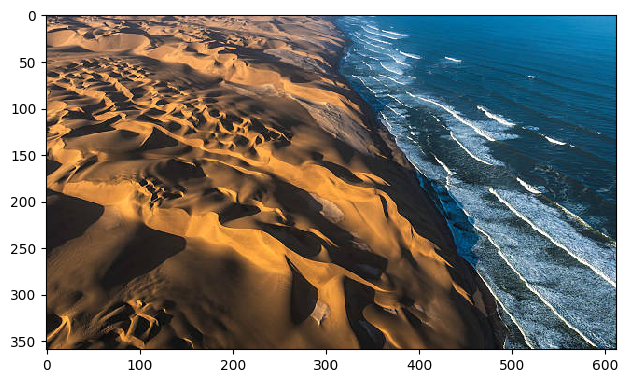

In [ ]:
image = io.imread("namib.jpg")
_ = io.imshow(image)

In [ ]:
noised_image = poissoning(image, lambda_value=64)
image.max(), noised_image.max()

(255, 255)

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


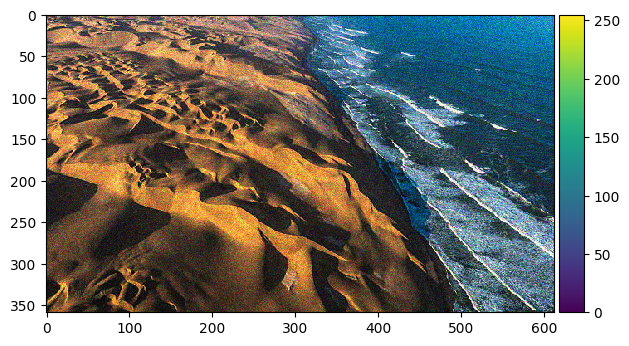

In [ ]:
_ = io.imshow(noised_image)

In [ ]:
def anscombe(x):
    """Computes Anscombe transform"""
    c = 3 / 8
    return 2 * np.sqrt(x + c)


def inv_anscombe(y):
    """Computes inverse Anscombe transform"""
    c = -1 * 3 / 8
    return np.power(0.5 * y, 2) + c

In [ ]:
def depoisson(image):
    x = image / image.max()
    x = anscombe(x)
    x = restoration.denoise_tv_chambolle(x)  # any Gaussian removal method can be used here
    x = inv_anscombe(x)
    return x

In [ ]:
transformed_image = depoisson(noised_image)
transformed_image.shape

(359, 612, 3)

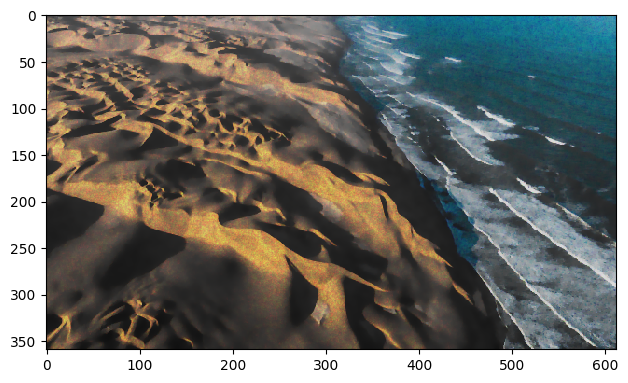

In [ ]:
_ = io.imshow(transformed_image)